## 1. Load all libraries:

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from os import system 
# from sklearn.preprocessing import Imputer
import xgboost as xgb

## 2. Load the data

In [2]:
tourism = pd.read_csv('/Users/khaledsharafaddin/Documents/Univ_Austin_Texas ML_AI/DataSets/Tourism.csv')
tourism.head()
tourism.info()
tourism.shape  # (4888, 20)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   TypeofContact            4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

(4888, 20)

In [3]:
tourism.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## 3. Perform an Exploratory Data Analysis


Basic           37.684124
Deluxe          35.433715
Standard        15.180033
Super Deluxe     6.996727
King             4.705401
Name: ProductPitched, dtype: float64

Male       59.656301
Female     37.172668
Fe Male     3.171031
Name: Gender, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='count'>

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DurationOfPitch'}>],
       [<AxesSubplot:title={'center':'NumberOfPersonVisited'}>,
        <AxesSubplot:title={'center':'PitchSatisfactionScore'}>],
       [<AxesSubplot:title={'center':'MonthlyIncome'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,MonthlyIncome
CustomerID,1.000000,0.056506,0.032127,0.012975,0.064298,0.604013,0.427539,0.010553,0.224848,0.007974,-0.035847,0.003805,0.511763,0.276833
ProdTaken,0.056506,1.000000,-0.147254,0.086852,0.078257,0.009627,0.112171,0.099577,0.018898,0.260844,0.051394,-0.011508,0.007421,-0.130585
Age,0.032127,-0.147254,1.000000,-0.015625,-0.012063,0.011621,-0.002577,-0.010474,0.184905,0.033399,0.018510,0.048654,0.007370,0.464869
CityTier,0.012975,0.086852,-0.015625,1.000000,0.022703,-0.001671,0.023652,-0.009164,-0.029709,0.001793,-0.042160,0.003817,0.000672,0.051817
DurationOfPitch,0.064298,0.078257,-0.012063,0.022703,1.000000,0.065141,0.009434,-0.006637,0.009715,0.033034,-0.002880,-0.001626,0.031408,-0.006252
NumberOfPersonVisited,0.604013,0.009627,0.011621,-0.001671,0.065141,1.000000,0.328569,0.033867,0.195223,0.011177,-0.019581,0.010362,0.610621,0.195134
NumberOfFollowups,0.427539,0.112171,-0.002577,0.023652,0.009434,0.328569,1.000000,-0.024176,0.139517,0.004970,0.004054,0.012112,0.286425,0.176503
PreferredPropertyStar,0.010553,0.099577,-0.010474,-0.009164,-0.006637,0.033867,-0.024176,1.000000,0.012115,0.001040,-0.022701,0.015742,0.035798,0.014289
NumberOfTrips,0.224848,0.018898,0.184905,-0.029709,0.009715,0.195223,0.139517,0.012115,1.000000,0.012949,-0.004378,-0.011825,0.168795,0.139105
Passport,0.007974,0.260844,0.033399,0.001793,0.033034,0.011177,0.004970,0.001040,0.012949,1.000000,0.002926,-0.022330,0.020264,0.002545


0    81.178396
1    18.821604
Name: ProdTaken, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='Age'>

0    70.908347
1    29.091653
Name: Passport, dtype: float64

Text(0.5, 0.98, 'Designation by Gender')

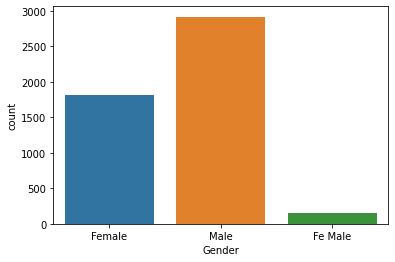

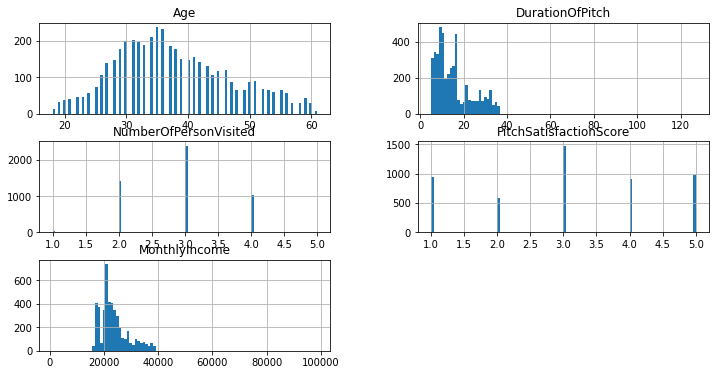

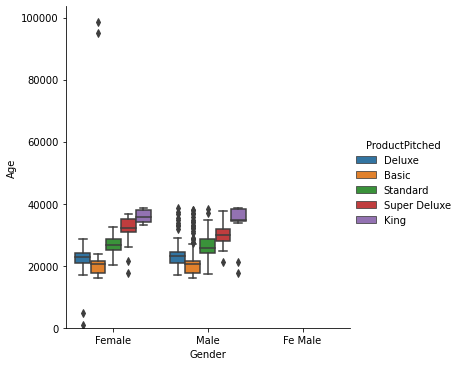

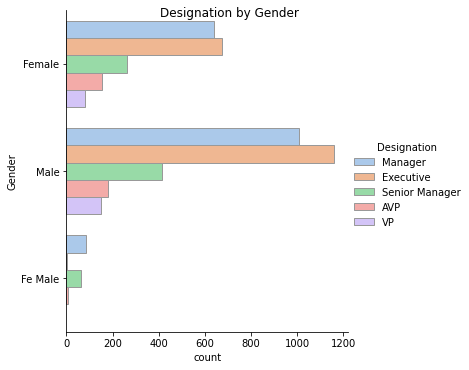

In [4]:
# a. ProductPitched Segmentation
tourism['ProductPitched'].value_counts()/tourism.shape[0]*100

# b. Male to Female ratio
tourism['Gender'].value_counts()/tourism.shape[0]*100
sns.countplot(x ='Gender', data = tourism) 

# c. Histogram for distribution of numeric values 
columns = ['Age', 'DurationOfPitch', 'NumberOfPersonVisited', 'PitchSatisfactionScore','MonthlyIncome']
tourism[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2))

# d. Correlations among variables 
tourism.corr()

# e. Ratio of those who took products 
tourism['ProdTaken'].value_counts()/tourism.shape[0]*100

# f. Those who have higher income tend to purchase high-end products such as super deluxe and king
sns.catplot(x="ProdTaken", y="MonthlyIncome", kind="box",hue="ProductPitched", data=tourism)

# g. Female to Male by Age Categories 
sns.barplot(x="Gender", y="Age", data=tourism)

# h. How many customers have travel documents  
tourism['Passport'].value_counts()/tourism.shape[0]*100

# i. Designation by Gender
ax = sns.catplot(y="Gender", hue="Designation", kind="count",
            palette="pastel", edgecolor=".6",
            data=tourism)
ax.fig.suptitle('Designation by Gender')


#### EDA Insights:
- There are 4888 rows and 20 columns in the dataset
- Approximately 73% of customers use Basic or the deluxe packages. 
- Male customers are slightely higher than females 
- The distribution of customer age is symmetric with mean 37 and median 36.
- The median monthly income of a customer is $22347
- There is a weak correlation between age and income of 0.4 
- Approx. 81% of customers have not taken the product in comparison to only 18.8% who did. There seems to be  a class imbalance here.
- Those who have higher income tend to purchase high-end products such as super deluxe and king
- 71% of customers don't have passports, which might result in less purchase and less traveling
- 37.9% of customers do not own a car, which could result in them not traveling as often as someone who has a car
- There are more Male Managers and executives than females. 

## 4. Data Cleaning, pre-processing and Handling Missing Values

In [5]:
# a. Gender needs to be standarized into two categories
tourism['Gender'] = tourism['Gender'].replace('Fe Male', 'Female')

# b. Customer_ID is not useful. Will be dropped 
tourism = tourism.drop(['CustomerID'], axis=1)

# c. There are several Missing values:

# c.1 Age will be replaced with the mean 
tourism['Age'] = tourism['Age'].fillna((tourism['Age'].mean()))

# c.2 Type of Contact NaN will be replaced with a third category called 'Unspecified'
tourism['TypeofContact'] = np.where(tourism['TypeofContact'].isnull(),"Unspecified",tourism['TypeofContact'])

# c.3 DurationOfPitch, numberoffollowups, and NumberOfTrips will be replaced with the mean
tourism['DurationOfPitch'] = tourism['DurationOfPitch'].fillna((tourism['DurationOfPitch'].mean()))
tourism['NumberOfFollowups'] = tourism['NumberOfFollowups'].fillna((tourism['NumberOfFollowups'].mean()))
tourism['NumberOfTrips'] = tourism['NumberOfTrips'].fillna((tourism['NumberOfTrips'].mean()))

# c.4 NumberOfChildrenVisited will be replaced with 0 
tourism['NumberOfChildrenVisited'] = tourism['NumberOfChildrenVisited'].fillna(0)

# c.5 PreferredPropertyStar is a category and will be replaced with 0 
tourism['PreferredPropertyStar'] = tourism['PreferredPropertyStar'].fillna(0.0)

# c.6 MonthlyIncome will be replaced with the median income 
tourism['MonthlyIncome'] = tourism['MonthlyIncome'].fillna((tourism['MonthlyIncome'].median()))


# d Replacing categorical ordered variables to numeric values 
replaceCat = {
    'TypeofContact':{'Unspecified': 0,'Self Enquiry':1, 'Company Invited':2},
    'Occupation':{'Salaried':1, 'Small Business':2, 'Large Business':3,'Free Lancer':4},
    'ProductPitched':{'Basic':0, 'Standard':1,'Deluxe':2,'Super Deluxe':3, 'King':4},
    'Designation': {'Executive':0, 'VP':1, 'AVP':2, 'Senior Manager':3,'Manager':4}
    }

tourism = tourism.replace(replaceCat)


# e Create dummy variables for MaritalStatus and Gender
onehotencoder = ['MaritalStatus', 'Gender']
tourism = pd.get_dummies(tourism, columns = onehotencoder)


# f. Convert all object types to categorical
for feature in tourism.columns:
    if tourism[feature].dtype=='object':
        tourism[feature] = pd.Categorical(tourism[feature])
       

## 5. Prepare Data for Modeling

In [6]:
# 5.1 Create a train and test sets
X = tourism.drop(['ProdTaken'], axis=1)  
y = tourism['ProdTaken']

# 5.2 Split into train and test, with stratify because there is class imbalance
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

### which metric is right for model? 
- We are interested in finding customers who may take new offering of packages (ProdTaken=1)
- The travel package purchase dataset has class imbalance. Approx. 81% of the product taken categories are no (0), and therefore accuracy is not a good measure.
- Recall: aims to find the proportion of actual positives was identified correctly. 
- Therefore, recall is a good measure here, because the marketing cost of identifying customers who might NOT take the product is costly.

## 6. Function to produce metrics such as accuracy, precision, and recall for train and test sets and Confusion Matrix:


In [7]:

# Create a confusion Matrix 
def make_confusion_matrix(model, y_actual, labels=[1,0]):
    y_predict = model.predict(x_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0,1])
    df_cm  = pd.DataFrame(cm, index=[i for i in ['Actual-No', 'Actual-Yes']],
                          columns =[i for i in ['Predicted-No', 'Predicted-Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels= np.asarray(labels).reshape(2,2)
    plt.figure(figsize=(10,7))
    sns.heatmap(df_cm, annot=labels, fmt='')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')


 # Create function to calculate all scores and prints them nicely:

def get_metrics_score(model, flag=True):
    # empty list to store results
    score_list = []
    
    # Predict on train and test
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    
    # Accuracy
    acc_train = model.score(x_train, y_train)
    acc_test = model.score(x_test, y_test)
    
    # Recall
    recall_train = metrics.recall_score(y_train, pred_train)
    recall_test = metrics.recall_score(y_test, pred_test)
    
    # Percision
    perc_train = metrics.precision_score(y_train, pred_train)
    perc_test = metrics.precision_score(y_test, pred_test)
    
    score_list.extend((acc_train, acc_test, recall_train, recall_test, 
                   perc_train,   perc_test ))
    
    if flag == True: 
        print("Accuracy on training set : ",model.score(x_train,y_train))
        print("Accuracy on test set : ",model.score(x_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

## 7. Model building - Bagging 


BaggingClassifier(random_state=1)

Accuracy on training set :  0.9950306927798889
Accuracy on test set :  0.912747102931152
Recall on training set :  0.9751552795031055
Recall on test set :  0.6231884057971014
Precision on training set :  0.9984101748807631
Precision on test set :  0.8775510204081632


[0.9950306927798889,
 0.912747102931152,
 0.9751552795031055,
 0.6231884057971014,
 0.9984101748807631,
 0.8775510204081632]

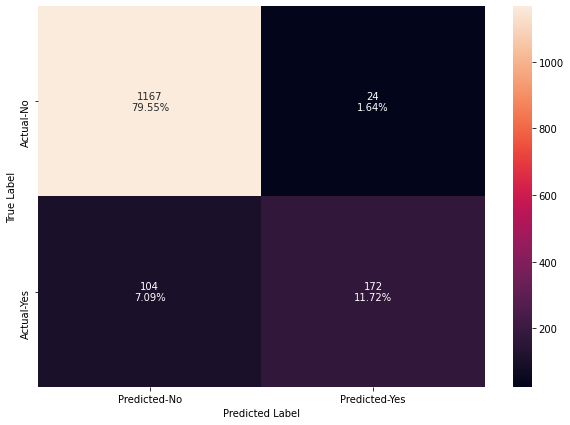

In [8]:
# Bagging Classfier

baggining_estimator = BaggingClassifier(random_state=1)
baggining_estimator.fit(x_train, y_train)

# Bagging Metrics and Confusion Matrix
make_confusion_matrix(baggining_estimator, y_test)
get_metrics_score(baggining_estimator)


BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=100,
                  random_state=1)

Accuracy on training set :  1.0
Accuracy on test set :  0.9222903885480572
Recall on training set :  1.0
Recall on test set :  0.6340579710144928
Precision on training set :  1.0
Precision on test set :  0.9308510638297872


[1.0, 0.9222903885480572, 1.0, 0.6340579710144928, 1.0, 0.9308510638297872]

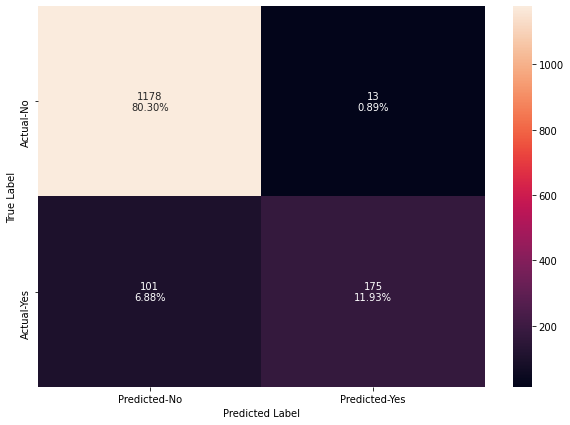

In [9]:
# 7.2 Bagging Classfier with Grid Search 

baggining_estimator_tuned = BaggingClassifier(random_state=1)

# Grid search 
parameters = {
    'max_samples': [0.6,0.7, 0.8, 0.9, 1], # 70% to 100% of the data
    'max_features': [0.6,0.7, 0.8, 0.9, 1], 
    'n_estimators': [10,20, 30, 40, 50, 100] # number of trees in the forest
}

# Type of scoring used to compare parameter combination
acct_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(baggining_estimator_tuned, parameters, scoring=acct_scorer, cv=5)
grid_obj= grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters automatically:
baggining_estimator_tuned = grid_obj.best_estimator_

# fit the best algorithm to the data
baggining_estimator_tuned.fit(x_train, y_train)

# Bagging Metrics and Confusion Matrix
make_confusion_matrix(baggining_estimator_tuned, y_test)
get_metrics_score(baggining_estimator_tuned)



In [10]:
### Bagging Insights: 
# The training sets seem to overfit 
# Precision on the test set performs really well with 0.95 precision score.
# Recall on the test set performs poorly with 0.49 recall score. 

RandomForestClassifier(random_state=1)

Accuracy on training set :  1.0
Accuracy on test set :  0.9086571233810498
Recall on training set :  1.0
Recall on test set :  0.5652173913043478
Precision on training set :  1.0
Precision on test set :  0.9176470588235294


[1.0, 0.9086571233810498, 1.0, 0.5652173913043478, 1.0, 0.9176470588235294]

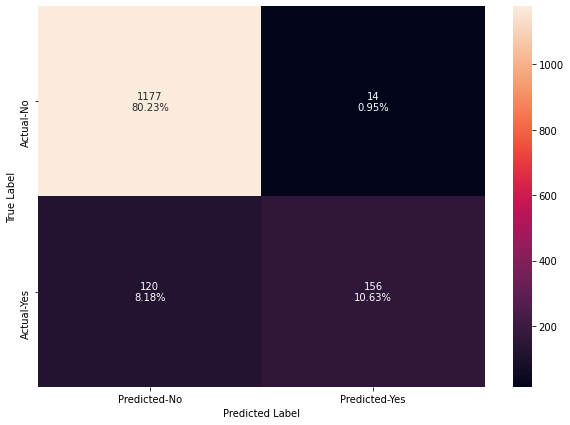

In [11]:
## 7.3 Random Forest 

rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(x_train, y_train)

# Bagging Metrics and Confusion Matrix
make_confusion_matrix(rf_estimator, y_test)
get_metrics_score(rf_estimator)

In [12]:
# 7.4 Random Forest Model Tuned:

rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Note: class_weight says: put more emphasis on the customers who will take products 1 by 70%. 
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
              "class_weight": [{0:0.3, 1:0.7}] 
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(x_train, y_train)


RandomForestClassifier(class_weight={0: 0.3, 1: 0.7},
                       max_features=0.5000000000000001, min_samples_leaf=6,
                       n_estimators=150, random_state=1)

Accuracy on training set :  0.9576147325343467
Accuracy on test set :  0.8888888888888888
Recall on training set :  0.8742236024844721
Recall on test set :  0.5869565217391305
Precision on training set :  0.89792663476874
Precision on test set :  0.7677725118483413


[0.9576147325343467,
 0.8888888888888888,
 0.8742236024844721,
 0.5869565217391305,
 0.89792663476874,
 0.7677725118483413]

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Feature Importances')

<BarContainer object of 22 artists>

([<matplotlib.axis.YTick at 0x7f9d1dc46b10>,
 [Text(0, 0, 'Gender_Female'),
  Text(0, 1, 'Gender_Male'),
  Text(0, 2, 'NumberOfPersonVisited'),
  Text(0, 3, 'MaritalStatus_Divorced'),
  Text(0, 4, 'NumberOfChildrenVisited'),
  Text(0, 5, 'OwnCar'),
  Text(0, 6, 'TypeofContact'),
  Text(0, 7, 'MaritalStatus_Unmarried'),
  Text(0, 8, 'MaritalStatus_Married'),
  Text(0, 9, 'Occupation'),
  Text(0, 10, 'MaritalStatus_Single'),
  Text(0, 11, 'PreferredPropertyStar'),
  Text(0, 12, 'NumberOfFollowups'),
  Text(0, 13, 'PitchSatisfactionScore'),
  Text(0, 14, 'NumberOfTrips'),
  Text(0, 15, 'Designation'),
  Text(0, 16, 'CityTier'),
  Text(0, 17, 'ProductPitched'),
  Text(0, 18, 'DurationOfPitch'),
  Text(0, 19, 'MonthlyIncome'),
  Text(0, 20, 'Age'),
  Text(0, 21, 'Passport')])

Text(0.5, 0, 'Relative Importance')

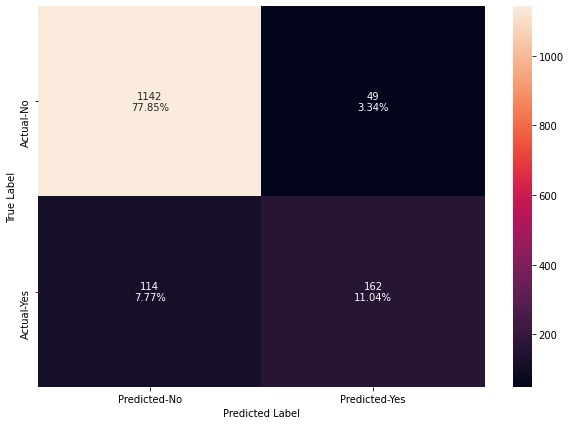

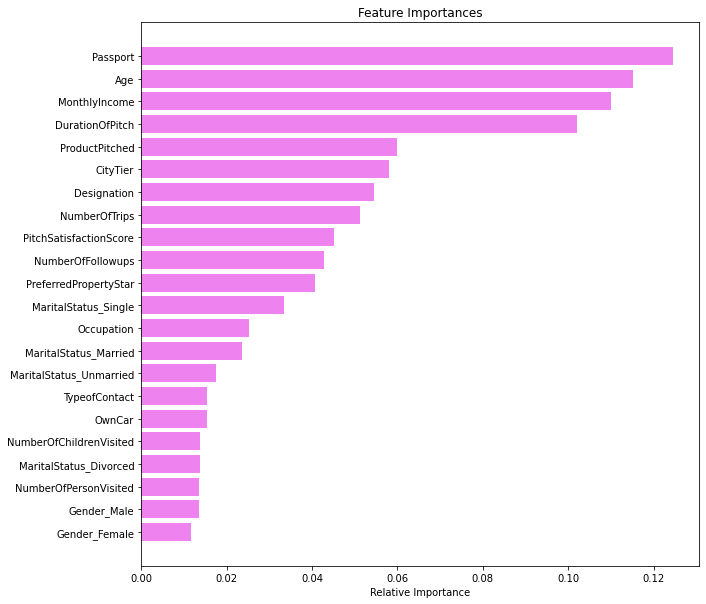

In [13]:
# RF Metrics and Confusion Matrix
make_confusion_matrix(rf_estimator_tuned, y_test)
get_metrics_score(rf_estimator_tuned)

# Important Features: 
importances = rf_estimator_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = X.columns

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [14]:
# Random Forest Insights: 
# The training sets seem to overfit the data 
# Precision on the test set performs really well with 0.95 precision score.
# Recall on the test set performs poorly with 0.49 recall score.

DecisionTreeClassifier(random_state=1)

Accuracy on training set :  1.0
Accuracy on test set :  0.8752556237218814
Recall on training set :  1.0
Recall on test set :  0.6268115942028986
Precision on training set :  1.0
Precision on test set :  0.6837944664031621


[1.0, 0.8752556237218814, 1.0, 0.6268115942028986, 1.0, 0.6837944664031621]

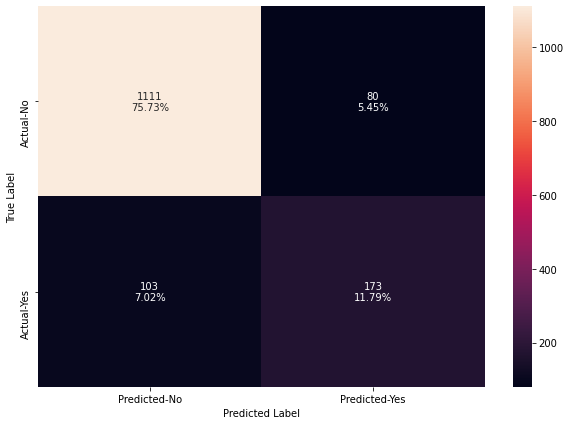

In [15]:
# 7.5 Decision Tree 



dt_estimator = DecisionTreeClassifier(random_state=1)
dt_estimator.fit(x_train, y_train)

# Bagging Metrics and Confusion Matrix
make_confusion_matrix(dt_estimator, y_test)
get_metrics_score(dt_estimator)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3,
                       min_impurity_decrease=0.001, random_state=1)

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Feature Importances')

<BarContainer object of 22 artists>

([<matplotlib.axis.YTick at 0x7f9d1e8e39d0>,
 [Text(0, 0, 'Age'),
  Text(0, 1, 'MaritalStatus_Unmarried'),
  Text(0, 2, 'MaritalStatus_Single'),
  Text(0, 3, 'MaritalStatus_Married'),
  Text(0, 4, 'MaritalStatus_Divorced'),
  Text(0, 5, 'MonthlyIncome'),
  Text(0, 6, 'NumberOfChildrenVisited'),
  Text(0, 7, 'OwnCar'),
  Text(0, 8, 'PitchSatisfactionScore'),
  Text(0, 9, 'Gender_Female'),
  Text(0, 10, 'Gender_Male'),
  Text(0, 11, 'PreferredPropertyStar'),
  Text(0, 12, 'ProductPitched'),
  Text(0, 13, 'NumberOfFollowups'),
  Text(0, 14, 'NumberOfPersonVisited'),
  Text(0, 15, 'Occupation'),
  Text(0, 16, 'DurationOfPitch'),
  Text(0, 17, 'CityTier'),
  Text(0, 18, 'TypeofContact'),
  Text(0, 19, 'NumberOfTrips'),
  Text(0, 20, 'Designation'),
  Text(0, 21, 'Passport')])

Text(0.5, 0, 'Relative Importance')

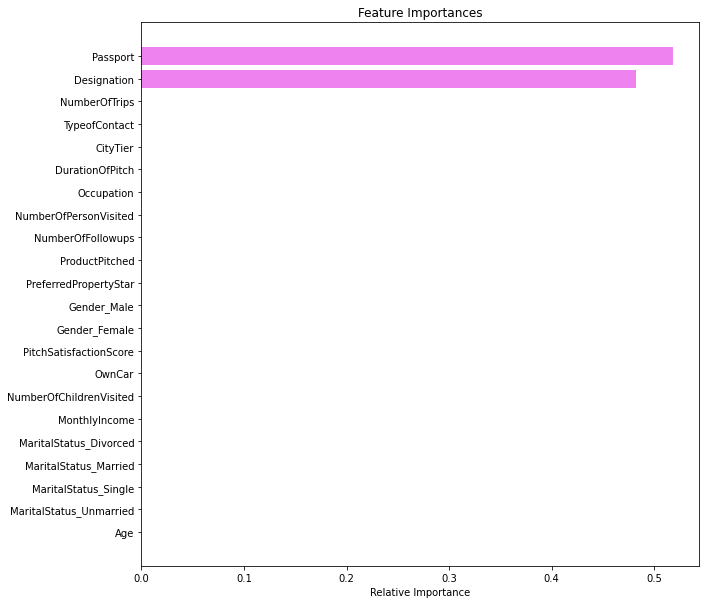

In [16]:
# 7.6 Decision Tree Tuned

Decision_Tree_estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(Decision_Tree_estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
Decision_Tree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
Decision_Tree_estimator.fit(x_train, y_train)


# Important Features: 
importances = Decision_Tree_estimator.feature_importances_
indices = np.argsort(importances)
feature_names = X.columns

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## 8. Model Building - Boosting

AdaBoostClassifier(random_state=1)

Accuracy on training set :  0.84536685179772
Accuracy on test set :  0.8507157464212679
Recall on training set :  0.3090062111801242
Recall on test set :  0.32608695652173914
Precision on training set :  0.7031802120141343
Precision on test set :  0.7317073170731707


[0.84536685179772,
 0.8507157464212679,
 0.3090062111801242,
 0.32608695652173914,
 0.7031802120141343,
 0.7317073170731707]

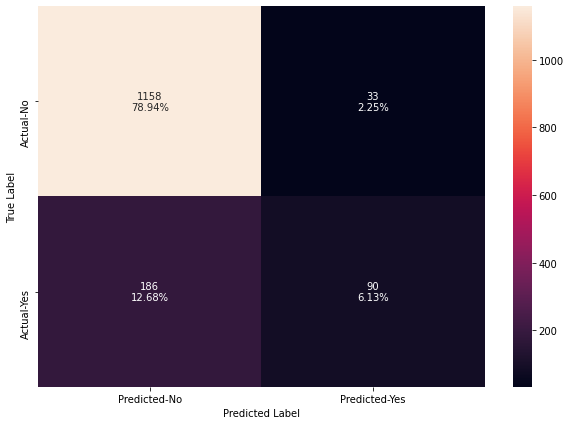

In [17]:
# 8.1 AdaBoost

adaboost = AdaBoostClassifier(random_state=1)
adaboost.fit(x_train, y_train)

# Matrix and Scores:
get_metrics_score(adaboost)
make_confusion_matrix(adaboost, y_test)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1),
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=1),
                                            DecisionTreeClassifier(max_depth=2),
                                            DecisionTreeClassifier(max_depth=3),
                                            DecisionTreeClassifier(max_depth=4),
                                            DecisionTreeClassifier(max_depth=5)],
                         'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])},
             scoring=make_scorer(recall_score))

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                   learning_rate=1.3000000000000003, n_estimators=60,
                   random_state=1)

Accuracy on training set :  1.0
Accuracy on test set :  0.880027266530334
Recall on training set :  1.0
Recall on test set :  0.5760869565217391
Precision on training set :  1.0
Precision on test set :  0.7293577981651376


[1.0, 0.880027266530334, 1.0, 0.5760869565217391, 1.0, 0.7293577981651376]

<Figure size 864x864 with 0 Axes>

Text(0.5, 1.0, 'Feature Importance')

<BarContainer object of 22 artists>

([<matplotlib.axis.YTick at 0x7f9d1807af90>,
 [Text(0, 0, 'MaritalStatus_Divorced'),
  Text(0, 1, 'Gender_Female'),
  Text(0, 2, 'MaritalStatus_Unmarried'),
  Text(0, 3, 'MaritalStatus_Married'),
  Text(0, 4, 'MaritalStatus_Single'),
  Text(0, 5, 'OwnCar'),
  Text(0, 6, 'Gender_Male'),
  Text(0, 7, 'NumberOfChildrenVisited'),
  Text(0, 8, 'TypeofContact'),
  Text(0, 9, 'NumberOfPersonVisited'),
  Text(0, 10, 'ProductPitched'),
  Text(0, 11, 'PreferredPropertyStar'),
  Text(0, 12, 'CityTier'),
  Text(0, 13, 'NumberOfFollowups'),
  Text(0, 14, 'Designation'),
  Text(0, 15, 'Passport'),
  Text(0, 16, 'Occupation'),
  Text(0, 17, 'PitchSatisfactionScore'),
  Text(0, 18, 'NumberOfTrips'),
  Text(0, 19, 'DurationOfPitch'),
  Text(0, 20, 'Age'),
  Text(0, 21, 'MonthlyIncome')])

([<matplotlib.axis.YTick at 0x7f9d1807af90>,
 [Text(0, 0, 'MaritalStatus_Divorced'),
  Text(0, 1, 'Gender_Female'),
  Text(0, 2, 'MaritalStatus_Unmarried'),
  Text(0, 3, 'MaritalStatus_Married'),
  Text(0, 4, 'MaritalStatus_Single'),
  Text(0, 5, 'OwnCar'),
  Text(0, 6, 'Gender_Male'),
  Text(0, 7, 'NumberOfChildrenVisited'),
  Text(0, 8, 'TypeofContact'),
  Text(0, 9, 'NumberOfPersonVisited'),
  Text(0, 10, 'ProductPitched'),
  Text(0, 11, 'PreferredPropertyStar'),
  Text(0, 12, 'CityTier'),
  Text(0, 13, 'NumberOfFollowups'),
  Text(0, 14, 'Designation'),
  Text(0, 15, 'Passport'),
  Text(0, 16, 'Occupation'),
  Text(0, 17, 'PitchSatisfactionScore'),
  Text(0, 18, 'NumberOfTrips'),
  Text(0, 19, 'DurationOfPitch'),
  Text(0, 20, 'Age'),
  Text(0, 21, 'MonthlyIncome')])

Text(0.5, 0, 'Relative Importance')

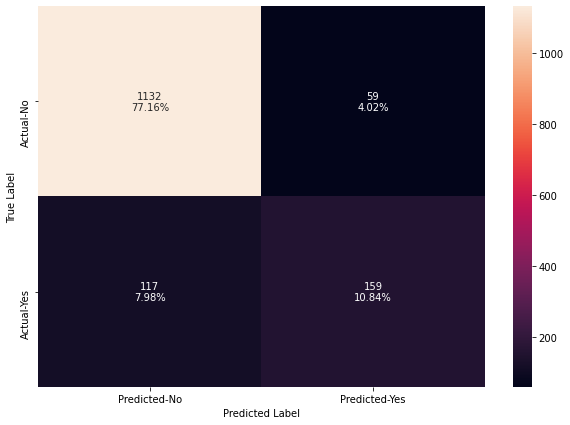

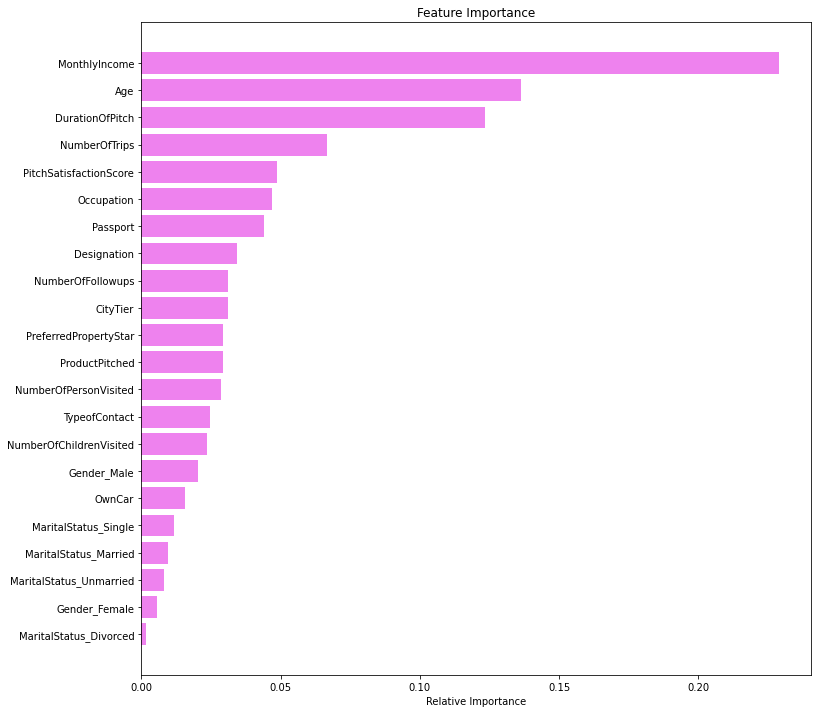

In [18]:
# 8.2 AdaBoost Tuned
adaboost_tuned = AdaBoostClassifier(random_state=1)

# base estimator can be decision trees with multiple depths
parameters = {
    'base_estimator':[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3),DecisionTreeClassifier(max_depth=4),DecisionTreeClassifier(max_depth=5)],
    'n_estimators':np.arange(10, 110, 10),
    'learning_rate': np.arange(0.1, 2, 0.1)
}
acct_score = metrics.make_scorer(metrics.recall_score)

# Grid search
grid_search = GridSearchCV(adaboost_tuned, parameters, scoring=acct_score, cv=5)
grid_search.fit(x_train, y_train)

adaboost_tuned = grid_search.best_estimator_

adaboost_tuned.fit(x_train, y_train)

# get score info for adaboost tuned 
get_metrics_score(adaboost_tuned)
make_confusion_matrix(adaboost_tuned, y_test)

# Important Features 
importance = adaboost_tuned.feature_importances_
indices  = np.argsort(importance)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importance[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

Accuracy on training set :  0.8883367436422098
Accuracy on test set :  0.8698023176550784
Recall on training set :  0.468944099378882
Recall on test set :  0.4166666666666667
Precision on training set :  0.8830409356725146
Precision on test set :  0.7931034482758621


[0.8883367436422098,
 0.8698023176550784,
 0.468944099378882,
 0.4166666666666667,
 0.8830409356725146,
 0.7931034482758621]

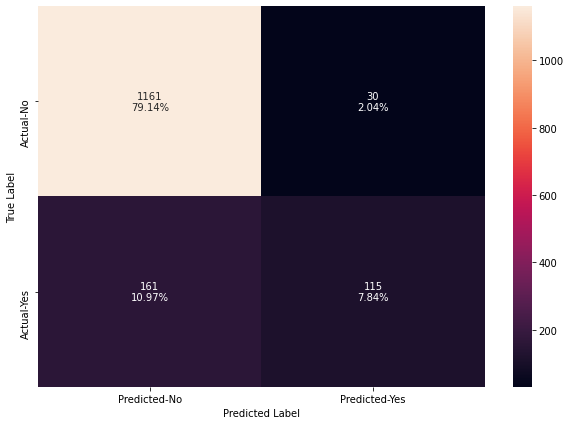

In [19]:
# 8.3 Gradient Boosting Classifier

gboosting = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1), random_state=1)
gboosting.fit(x_train, y_train)

# See results 
get_metrics_score(gboosting)
make_confusion_matrix(gboosting, y_test)



GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                  random_state=1),
             param_grid={'max_features': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [100, 150, 200, 250]},
             scoring=make_scorer(recall_score))

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1)

Accuracy on training set :  0.9172756503946214
Accuracy on test set :  0.8711656441717791
Recall on training set :  0.610248447204969
Recall on test set :  0.4492753623188406
Precision on training set :  0.9247058823529412
Precision on test set :  0.7701863354037267


[0.9172756503946214,
 0.8711656441717791,
 0.610248447204969,
 0.4492753623188406,
 0.9247058823529412,
 0.7701863354037267]

<Figure size 864x864 with 0 Axes>

Text(0.5, 1.0, 'Feature Importance')

<BarContainer object of 22 artists>

([<matplotlib.axis.YTick at 0x7f9d1e7c2f50>,
 [Text(0, 0, 'MaritalStatus_Divorced'),
  Text(0, 1, 'OwnCar'),
  Text(0, 2, 'NumberOfChildrenVisited'),
  Text(0, 3, 'Gender_Female'),
  Text(0, 4, 'Gender_Male'),
  Text(0, 5, 'MaritalStatus_Married'),
  Text(0, 6, 'NumberOfPersonVisited'),
  Text(0, 7, 'TypeofContact'),
  Text(0, 8, 'Occupation'),
  Text(0, 9, 'PitchSatisfactionScore'),
  Text(0, 10, 'MaritalStatus_Unmarried'),
  Text(0, 11, 'PreferredPropertyStar'),
  Text(0, 12, 'MaritalStatus_Single'),
  Text(0, 13, 'NumberOfTrips'),
  Text(0, 14, 'NumberOfFollowups'),
  Text(0, 15, 'CityTier'),
  Text(0, 16, 'Designation'),
  Text(0, 17, 'ProductPitched'),
  Text(0, 18, 'DurationOfPitch'),
  Text(0, 19, 'Passport'),
  Text(0, 20, 'Age'),
  Text(0, 21, 'MonthlyIncome')])

([<matplotlib.axis.YTick at 0x7f9d1e7c2f50>,
 [Text(0, 0, 'MaritalStatus_Divorced'),
  Text(0, 1, 'OwnCar'),
  Text(0, 2, 'NumberOfChildrenVisited'),
  Text(0, 3, 'Gender_Female'),
  Text(0, 4, 'Gender_Male'),
  Text(0, 5, 'MaritalStatus_Married'),
  Text(0, 6, 'NumberOfPersonVisited'),
  Text(0, 7, 'TypeofContact'),
  Text(0, 8, 'Occupation'),
  Text(0, 9, 'PitchSatisfactionScore'),
  Text(0, 10, 'MaritalStatus_Unmarried'),
  Text(0, 11, 'PreferredPropertyStar'),
  Text(0, 12, 'MaritalStatus_Single'),
  Text(0, 13, 'NumberOfTrips'),
  Text(0, 14, 'NumberOfFollowups'),
  Text(0, 15, 'CityTier'),
  Text(0, 16, 'Designation'),
  Text(0, 17, 'ProductPitched'),
  Text(0, 18, 'DurationOfPitch'),
  Text(0, 19, 'Passport'),
  Text(0, 20, 'Age'),
  Text(0, 21, 'MonthlyIncome')])

Text(0.5, 0, 'Relative Importance')

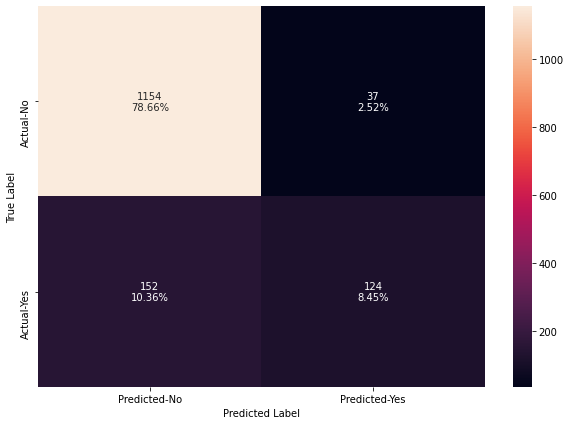

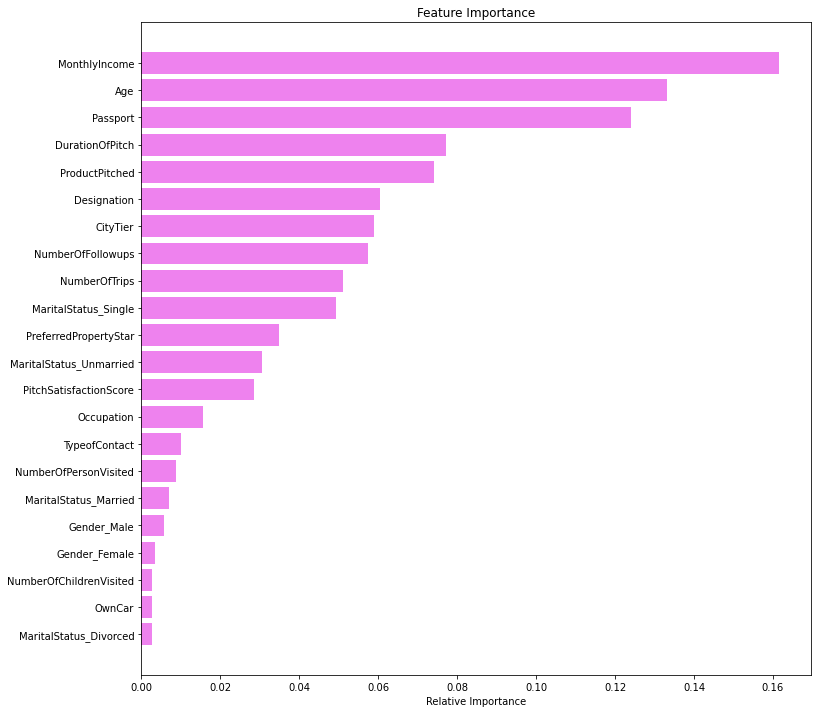

In [20]:
# 8.4 Gradient Boosting Classifier Tuned


gboosting_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1), random_state=1)

# Grid search 
parameters = {
    'n_estimators': [100, 150,200, 250],  # num of trees
    'max_features': [0.7, 0.8, 0.9, 1], 
    'max_features': [0.7, 0.8, 0.9, 1] 
}

acc_scorer = metrics.make_scorer(metrics.recall_score)
grid_obj = GridSearchCV(gboosting_tuned, parameters,scoring=acc_scorer, cv=5)
grid_obj.fit(x_train, y_train)

gboosting_tuned = grid_obj.best_estimator_

# Fit on best estimators
gboosting_tuned.fit(x_train, y_train)

# See results 
get_metrics_score(gboosting_tuned)
make_confusion_matrix(gboosting_tuned, y_test)

# Important Features:
importance = gboosting_tuned.feature_importances_
indices  = np.argsort(importance)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importance[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

XGBClassifier(eval_metric='logloss', random_state=1)

Accuracy on training set :  0.8775211926337328
Accuracy on test set :  0.8623040218132243
Recall on training set :  0.4114906832298137
Recall on test set :  0.36594202898550726
Precision on training set :  0.8688524590163934
Precision on test set :  0.7890625


[0.8775211926337328,
 0.8623040218132243,
 0.4114906832298137,
 0.36594202898550726,
 0.8688524590163934,
 0.7890625]

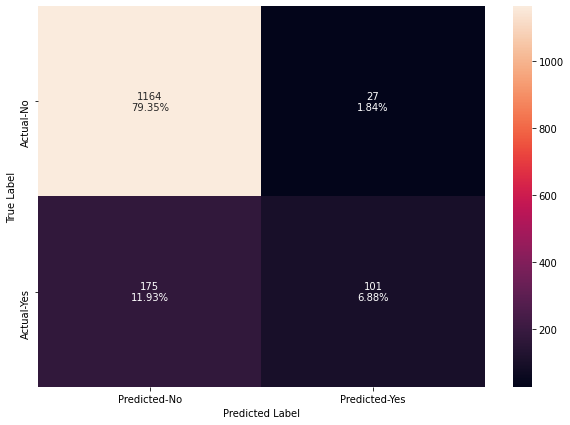

In [21]:
# 8.5 XGBOOST Classifier 

xgb_classifier = xgb.XGBClassifier(random_state=1, eval_metric='logloss')

# Fit the best algorithm to the data.
xgb_classifier.fit(x_train, y_train)

get_metrics_score(xgb_classifier)
make_confusion_matrix(xgb_classifier, y_test)


XGBClassifier(eval_metric='logloss', learning_rate=1, n_estimators=10,
              random_state=1, scale_pos_weight=5)

Accuracy on training set :  0.7886582870505701
Accuracy on test set :  0.754601226993865
Recall on training set :  0.8245341614906833
Recall on test set :  0.7717391304347826
Precision on training set :  0.4653812445223488
Precision on test set :  0.4176470588235294


[0.7886582870505701,
 0.754601226993865,
 0.8245341614906833,
 0.7717391304347826,
 0.4653812445223488,
 0.4176470588235294]

<Figure size 864x864 with 0 Axes>

Text(0.5, 1.0, 'Feature Importance')

<BarContainer object of 22 artists>

([<matplotlib.axis.YTick at 0x7f9d1e1cc3d0>,
 [Text(0, 0, 'Gender_Male'),
  Text(0, 1, 'MaritalStatus_Married'),
  Text(0, 2, 'MaritalStatus_Divorced'),
  Text(0, 3, 'NumberOfChildrenVisited'),
  Text(0, 4, 'TypeofContact'),
  Text(0, 5, 'OwnCar'),
  Text(0, 6, 'Gender_Female'),
  Text(0, 7, 'Occupation'),
  Text(0, 8, 'NumberOfTrips'),
  Text(0, 9, 'Designation'),
  Text(0, 10, 'MonthlyIncome'),
  Text(0, 11, 'PitchSatisfactionScore'),
  Text(0, 12, 'NumberOfPersonVisited'),
  Text(0, 13, 'DurationOfPitch'),
  Text(0, 14, 'NumberOfFollowups'),
  Text(0, 15, 'Age'),
  Text(0, 16, 'MaritalStatus_Unmarried'),
  Text(0, 17, 'PreferredPropertyStar'),
  Text(0, 18, 'ProductPitched'),
  Text(0, 19, 'MaritalStatus_Single'),
  Text(0, 20, 'CityTier'),
  Text(0, 21, 'Passport')])

([<matplotlib.axis.YTick at 0x7f9d1e1cc3d0>,
 [Text(0, 0, 'Gender_Male'),
  Text(0, 1, 'MaritalStatus_Married'),
  Text(0, 2, 'MaritalStatus_Divorced'),
  Text(0, 3, 'NumberOfChildrenVisited'),
  Text(0, 4, 'TypeofContact'),
  Text(0, 5, 'OwnCar'),
  Text(0, 6, 'Gender_Female'),
  Text(0, 7, 'Occupation'),
  Text(0, 8, 'NumberOfTrips'),
  Text(0, 9, 'Designation'),
  Text(0, 10, 'MonthlyIncome'),
  Text(0, 11, 'PitchSatisfactionScore'),
  Text(0, 12, 'NumberOfPersonVisited'),
  Text(0, 13, 'DurationOfPitch'),
  Text(0, 14, 'NumberOfFollowups'),
  Text(0, 15, 'Age'),
  Text(0, 16, 'MaritalStatus_Unmarried'),
  Text(0, 17, 'PreferredPropertyStar'),
  Text(0, 18, 'ProductPitched'),
  Text(0, 19, 'MaritalStatus_Single'),
  Text(0, 20, 'CityTier'),
  Text(0, 21, 'Passport')])

Text(0.5, 0, 'Relative Importance')

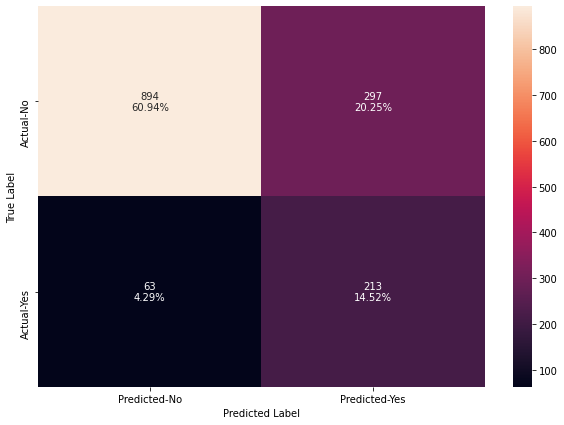

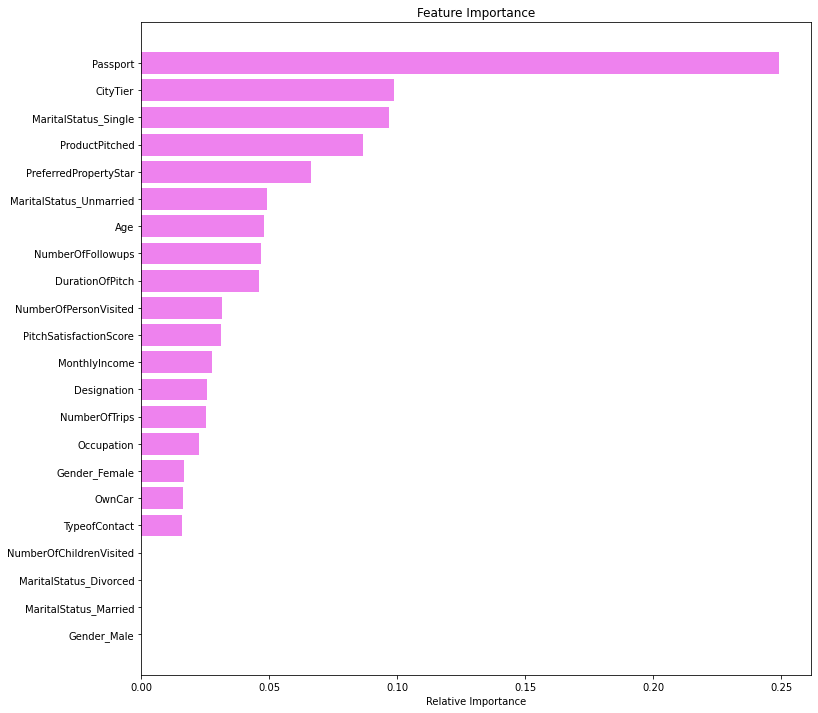

In [22]:
# 8.6 XGBOOST Classifier TUNED

xgb_tuned = xgb.XGBClassifier(random_state=1, eval_metric='logloss')


parameters = {
    "n_estimators": [10,50,100],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.5,1],
    "learning_rate":[0.01,0.1,1],
    "gamma":[0,1,3],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(x_train, y_train)

get_metrics_score(xgb_tuned)
make_confusion_matrix(xgb_tuned, y_test)


# Important Features:
importance = xgb_tuned.feature_importances_
indices  = np.argsort(importance)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importance[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## 9. Actionable Insights & Recommendations



In [24]:


all_models = [baggining_estimator, baggining_estimator_tuned,
              rf_estimator, rf_estimator_tuned,
              dt_estimator, Decision_Tree_estimator,
              adaboost, adaboost_tuned, 
              gboosting, gboosting_tuned,
              xgb_classifier, xgb_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in all_models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

    
# Put everything in a dataframe
comprison = pd.DataFrame(
{
    'Model':["baggining_estimator", "baggining_estimator_tuned",
              "rf_estimator", "rf_estimator_tuned",
              "dt_estimator", "Decision_Tree_estimator",
              "adaboost", "adaboost_tuned", 
              "gboosting", "gboosting_tuned",
              "xgb_classifier", "xgb_tuned"],
    'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test})


coparison_final = comprison.sort_values(["Test_Recall"], ascending = True)
coparison_final


,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
6,adaboost,0.85,0.85,0.31,0.33,0.70,0.73
5,Decision_Tree_estimator,0.82,0.84,0.34,0.37,0.54,0.63
10,xgb_classifier,0.88,0.86,0.41,0.37,0.87,0.79
8,gboosting,0.89,0.87,0.47,0.42,0.88,0.79
9,gboosting_tuned,0.92,0.87,0.61,0.45,0.92,0.77
2,rf_estimator,1.00,0.91,1.00,0.57,1.00,0.92
7,adaboost_tuned,1.00,0.88,1.00,0.58,1.00,0.73
3,rf_estimator_tuned,0.96,0.89,0.87,0.59,0.90,0.77
0,baggining_estimator,1.00,0.91,0.98,0.62,1.00,0.88
1,baggining_estimator_tuned,1.00,0.92,1.00,0.63,1.00,0.93


 ### Insights:
 
 - Test accuracy metric seems to perform well for all models, ranging from 0.75 to 0.92. The high level of accuracy ,however, is not a good measure of identifying cutsomers due to the severe class imbalance in the target variable prod_taken. 
  
- Recall is a good measure here because Visit with us company. Recall is a good measure here, because the marketing cost of identifying customers who might NOT take the product is high.


- The recall metric for the training set overfits the data for Random Forest, Adaboost Tuned, Bagging and Decision Tree Tuned models. At the same time, it performs poorly on both the training and testing datasets for Adaboost, Decision Tree, xgboost, and Gradient Boost models. 


- The Recall metric for Tuned xgboost model performs well for both recall in the training and the testing dataset, with 0.82 and 0.77 respectivley. The train recall does not overfit a lot and the test recall is high. 


- The analysis suggests that Visit with us travel agency can use xgb_tuned model to predict whether a customer will take the travel package. 


- The company should take into consideration the following factors when determining advertising costs and customer segmentation: customers who own a passport, designation, age and monthly income. 


- The compnay should also consider trying additional models tuning analysis or add new models such as logistic regression, or neural networks for future insights. 